In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PSO_species.pso as pso
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [2]:
# Experiment Parameters:

dimension = 3
number_of_particles = 100
bounds = [[-100,100] for _ in range(dimension)]
use_adaptive_hyper_parameters = True
use_adaptive_boxes = True
use_species = True
species_weights = [0.4, 0.3, 0.2, 0.1]
maximise = False

def GenerateY (X):
    result = 0
    for x in X:
        result += x**2
    return result

In [3]:
# Initialise the SWARM

pso = pso.Pso(dimension, number_of_particles, bounds, use_adaptive_hyper_parameters, use_adaptive_boxes, use_species, species_weights, GenerateY, maximise)

In [4]:
pso.InitialiseSwarm()

/home/vol01/scarf1371/anaconda3/envs/Bayesian/lib/python3.11/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [5]:
# X0 = [pso.swarm.particles[p].position[0] for p in range(pso.number_of_particles)]
# X1 = [pso.swarm.particles[p].position[1] for p in range(pso.number_of_particles)]
# X2 = [pso.swarm.particles[p].position[2] for p in range(pso.number_of_particles)]
# V0 = [pso.swarm.particles[p].velocity[0] for p in range(pso.number_of_particles)]
# V1 = [pso.swarm.particles[p].velocity[1] for p in range(pso.number_of_particles)]
# V2 = [pso.swarm.particles[p].velocity[2] for p in range(pso.number_of_particles)]

# import plotly.graph_objects as go
# import numpy as np

# # Generate some random data for positions
# np.random.seed(0)
# x = np.random.rand(10)
# y = np.random.rand(10)
# z = np.random.rand(10)

# # Generate some random data for velocities
# vx = np.random.rand(10) - 0.5  # Velocity in x direction
# vy = np.random.rand(10) - 0.5  # Velocity in y direction
# vz = np.random.rand(10) - 0.5  # Velocity in z direction

# # Create scatter plot points
# scatter = go.Scatter3d(
#     x=X0,
#     y=X1,
#     z=X2,
#     mode='markers',
#     marker=dict(size=5, color='lightseagreen', opacity=0.8),
#     name='Particles'
# )

# # Create quivers (arrows) for velocities
# quivers = []
# for i in range(len(X0)):
#     quivers.append(go.Scatter3d(
#         x=[X0[i], X0[i] + V0[i]],
#         y=[X1[i], X1[i] + V1[i]],
#         z=[X2[i], X2[i] + V2[i]],
#         mode='lines',
#         line=dict(color='crimson', width=4),
#         showlegend=False
#     ))

# XV0 = np.add(X0, V0)
# XV1 = np.add(X1, V1)
# XV2 = np.add(X2, V2)

# cones = go.Cone(
#     x=XV0,
#     y=XV1,
#     z=XV2,
#     u=V0,
#     v=V1,
#     w=V2,
#     sizemode="absolute",
#     sizeref=0.3,
#     anchor="tail",
#     colorscale=[[0, 'crimson'], [1, 'crimson']],
#     showscale=False
# )


# # Combine scatter and quivers into one figure
# fig = go.Figure(data=[scatter] + quivers + [cones])

# fig.update_layout(
#     scene=dict(
#         xaxis=dict(
#             showbackground=False,
#             showgrid=False,
#             showline=False,
#             showticklabels=False,
#             zeroline=False
#         ),
#         yaxis=dict(
#             showbackground=False,
#             showgrid=False,
#             showline=False,
#             showticklabels=False,
#             zeroline=False
#         ),
#         zaxis=dict(
#             showbackground=False,
#             showgrid=False,
#             showline=False,
#             showticklabels=False,
#             zeroline=False
#         ),
#     ),
#     title=None,
#     showlegend=False
# )
# # Show the plot
# fig.show()


In [6]:
# benchmark function to be optimised:

def rosenbrock(x):
    total = 0
    if len(x) == pso.dimension:
        for i in range(len(x) - 1):
            total += 100*((x[i] - x[i+1])**2) + (x[i] - 1)**2
        return total

def schewfel(x):
    total1 = 0
    total2 = 1
    if len(x) == pso.dimension:
        for i in range(len(x)):
            total1 += np.abs(x[i])
            total2 = total2*np.abs(x[i])
        return total1 + total2

# Function to compute the Griewank function
def griewank(X):
    try:
        Y = []
        for x in X:
            total1 = 0
            total2 = 1
            for i in range(len(x)):
                total1 += x[i]**2
                total2 *= np.cos(x[i] / np.sqrt(i+1))
            y = total1 / 4000 - total2 + 1
            Y.append(y)
        return Y
    except:
        total1 = 0
        total2 = 1
        for i in range(len(X)):
            total1 += X[i]**2
            total2 *= np.cos(X[i] / np.sqrt(i+1))
        return total1 / 4000 - total2 + 1


In [7]:
# # Plotting the function to be optimised
# x_range = np.linspace(-100, 100, 100)
# y_range = np.linspace(-100, 100, 100)
# X, Y = np.meshgrid(x_range, y_range)

# # Compute Z values for each plane
# def compute_plane(X, Y, func, fixed_var, fixed_value):
#     Z = np.zeros_like(X)
#     for i in range(X.shape[0]):
#         for j in range(X.shape[1]):
#             if fixed_var == 'z':
#                 Z[i, j] = func([X[i, j], Y[i, j], fixed_value])
#             elif fixed_var == 'x':
#                 Z[i, j] = func([fixed_value, X[i, j], Y[i, j]])
#             elif fixed_var == 'y':
#                 Z[i, j] = func([X[i, j], fixed_value, Y[i, j]])
#     return Z

# # Calculate Z values
# Z_xy = compute_plane(X, Y, griewank, 'z', 1)  # z = 1
# Z_yz = compute_plane(X, Y, griewank, 'x', 1)  # x = 1
# Z_zx = compute_plane(X, Y, griewank, 'y', 1)  # y = 1

# # Plotting the heat maps
# fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# # XY plane
# c1 = axs[0].contourf(X, Y, Z_xy, levels=50, cmap='viridis')
# axs[0].set_title('Heatmap of Rosenbrock Function in XY plane')
# axs[0].set_xlabel('X')
# axs[0].set_ylabel('Y')
# fig.colorbar(c1, ax=axs[0])

# # YZ plane
# c2 = axs[1].contourf(X, Y, Z_yz, levels=50, cmap='viridis')
# axs[1].set_title('Heatmap of Rosenbrock Function in YZ plane')
# axs[1].set_xlabel('Y')
# axs[1].set_ylabel('Z')
# fig.colorbar(c2, ax=axs[1])

# # ZX plane
# c3 = axs[2].contourf(X, Y, Z_zx, levels=50, cmap='viridis')
# axs[2].set_title('Heatmap of Rosenbrock Function in ZX plane')
# axs[2].set_xlabel('Z')
# axs[2].set_ylabel('X')
# fig.colorbar(c3, ax=axs[2])

# plt.tight_layout()
# plt.show()

In [8]:
# Set the blackbox function to be optimised
pso.GenerateY = griewank 

In [9]:
# Setup the box width function
def BoxWidthFunction(iteration):
    if iteration < 10:
        return 44
    else:
         return 0.0001

pso.BoxWidthFunction = BoxWidthFunction

In [10]:
pso.GenerateAllBoxes()

# pso.swarm.boxes[0].bounds

In [11]:
def SampleSizeFunction(iteration):
    return 10

pso.SampleSizeFunction = SampleSizeFunction

pso.PopulateAllBoxes()

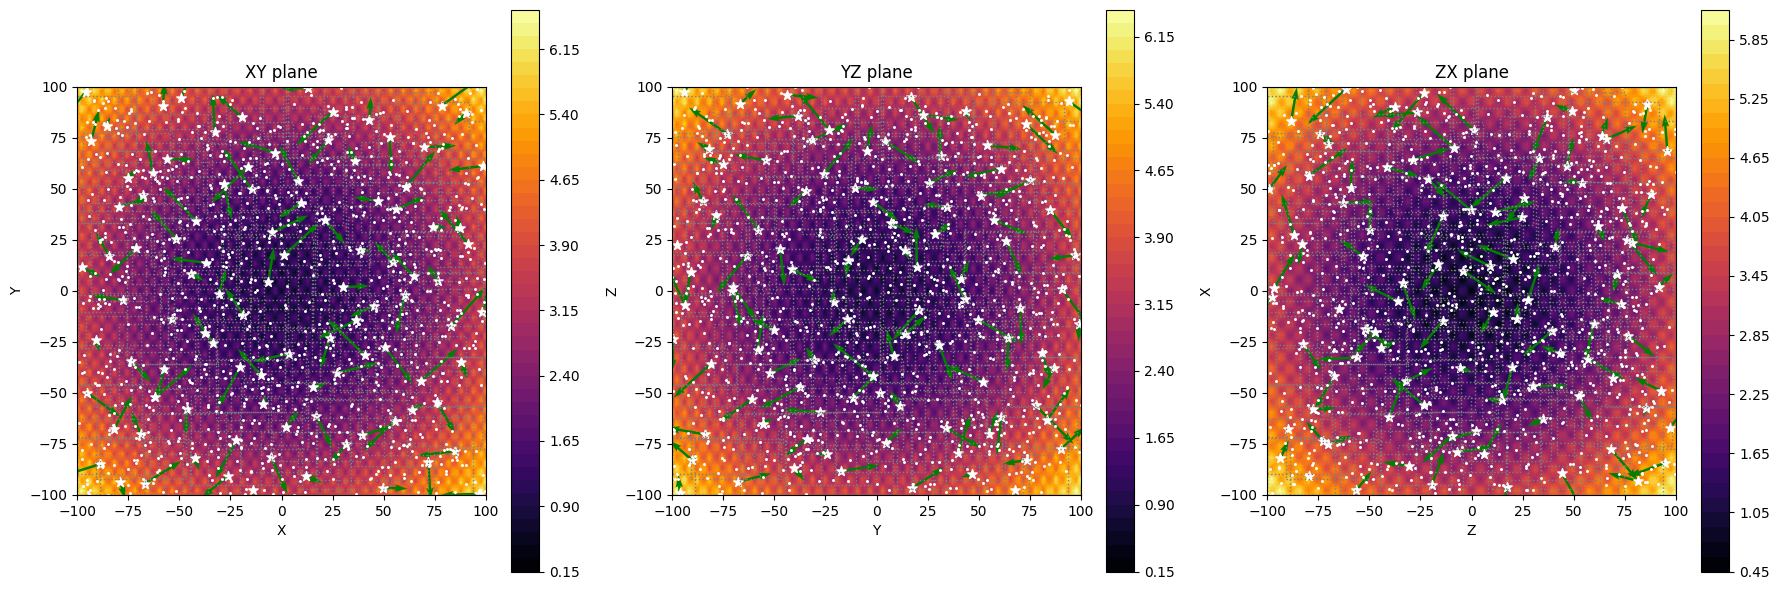

In [12]:
X0 = [pso.swarm.particles[p].position[0] for p in range(pso.number_of_particles)]
X1 = [pso.swarm.particles[p].position[1] for p in range(pso.number_of_particles)]
X2 = [pso.swarm.particles[p].position[2] for p in range(pso.number_of_particles)]
V0 = [pso.swarm.particles[p].velocity[0] for p in range(pso.number_of_particles)]
V1 = [pso.swarm.particles[p].velocity[1] for p in range(pso.number_of_particles)]
V2 = [pso.swarm.particles[p].velocity[2] for p in range(pso.number_of_particles)]
box_bounds = [pso.swarm.particles[p].box.bounds for p in range(pso.number_of_particles)]
# boxes_xx = [[box_bounds[p][0], box_bounds[p][0]] for p in range(pso.number_of_particles)]
# boxes_xy = [[box_bounds[p][0], box_bounds[p][1]] for p in range(pso.number_of_particles)]
# boxes_xz = [[box_bounds[p][0], box_bounds[p][2]] for p in range(pso.number_of_particles)]
sample_points = [[pso.swarm.particles[p].sample_points[s] for s in range(len(pso.swarm.particles[p].sample_points))] for p in range(pso.number_of_particles)]
all_sample_points = []
for p in range(len(sample_points)):
    for s in range(len(sample_points[p])):
        all_sample_points.append(sample_points[p][s]) 
all_sample_points_x = [sample_point[0] for sample_point in all_sample_points] 
all_sample_points_y = [sample_point[1] for sample_point in all_sample_points] 
all_sample_points_z = [sample_point[2] for sample_point in all_sample_points] 

# Function to compute the heat map for a given plane
def compute_plane(X, Y, func, fixed_var, fixed_value):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if fixed_var == 'z':
                Z[i, j] = func([X[i, j], Y[i, j], fixed_value])
            elif fixed_var == 'x':
                Z[i, j] = func([fixed_value, X[i, j], Y[i, j]])
            elif fixed_var == 'y':
                Z[i, j] = func([X[i, j], fixed_value, Y[i, j]])
    return Z

# Generate the grid for the heat maps
x_range = np.linspace(-100, 100, 100)
y_range = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x_range, y_range)

# Calculate Z values for each plane
Z_xy = compute_plane(X, Y, griewank, 'z', 1)  # z = 1
Z_xz = compute_plane(X, Y, griewank, 'y', 1)  # y = 1
Z_yz = compute_plane(X, Y, griewank, 'x', 1)  # x = 1

# Function to plot heatmap, particles, velocities, and boxes on a given plane
def plot_plane(ax, X, Y, VX, VY, bounds_2d, plane_name, Z, X_mesh, Y_mesh):
    c = ax.contourf(X_mesh, Y_mesh, Z, levels=50, cmap='inferno')
    fig.colorbar(c, ax=ax)
    ax.quiver(X, Y, VX, VY, angles='xy', scale_units='xy', scale=2, color='green')
    ax.scatter(X, Y, color='white', s=50, marker='*')
    for i in range(len(X)):
        x_min, x_max = bounds_2d[i][0]
        y_min, y_max = bounds_2d[i][1]
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='gray', linestyle='dotted'))
    ax.set_title(f"{plane_name} plane")
    ax.set_xlabel(plane_name[0])
    ax.set_ylabel(plane_name[1])
    ax.set_aspect('equal', adjustable='box')  # Ensure the aspect ratio is equal

# Plot on the xy, xz, and yz planes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# XY plane
plot_plane(axes[0], X0, X1, V0, V1, box_bounds, "XY", Z_xy, X, Y)
axes[0].scatter(all_sample_points_x, all_sample_points_y, color='w', marker='.', s=5)

# XZ plane
plot_plane(axes[1], X1, X2, V1, V2, box_bounds, "YZ", Z_xz, X, Y)
axes[1].scatter(all_sample_points_y, all_sample_points_z, color='w', marker='.', s=5)

# YZ plane
plot_plane(axes[2], X2, X0, V2, V0, box_bounds, "ZX", Z_yz, X, Y)
axes[2].scatter(all_sample_points_z, all_sample_points_x, color='w', marker='.', s=5)

plt.tight_layout()
plt.show()


In [13]:
pso.GetY()

In [14]:
# Pull the Y values into a single array
sample_points_results = []
for particle in pso.swarm.particles:
    sample_points_results.append(particle.sample_points_results)

# plt.scatter(np.arange(1000), np.sort(np.array(sample_points_results).ravel()), marker='.', s=0.1)

In [15]:
pso.UpdateLocalMaxima()
pso.UpdateGlobalMaxima()
print(pso.swarm.particles[24].local_max)

3.3964834877794385


In [16]:
print(pso.swarm.global_max_loc)

[ 21.17935298  -4.5225534  -22.88019609]


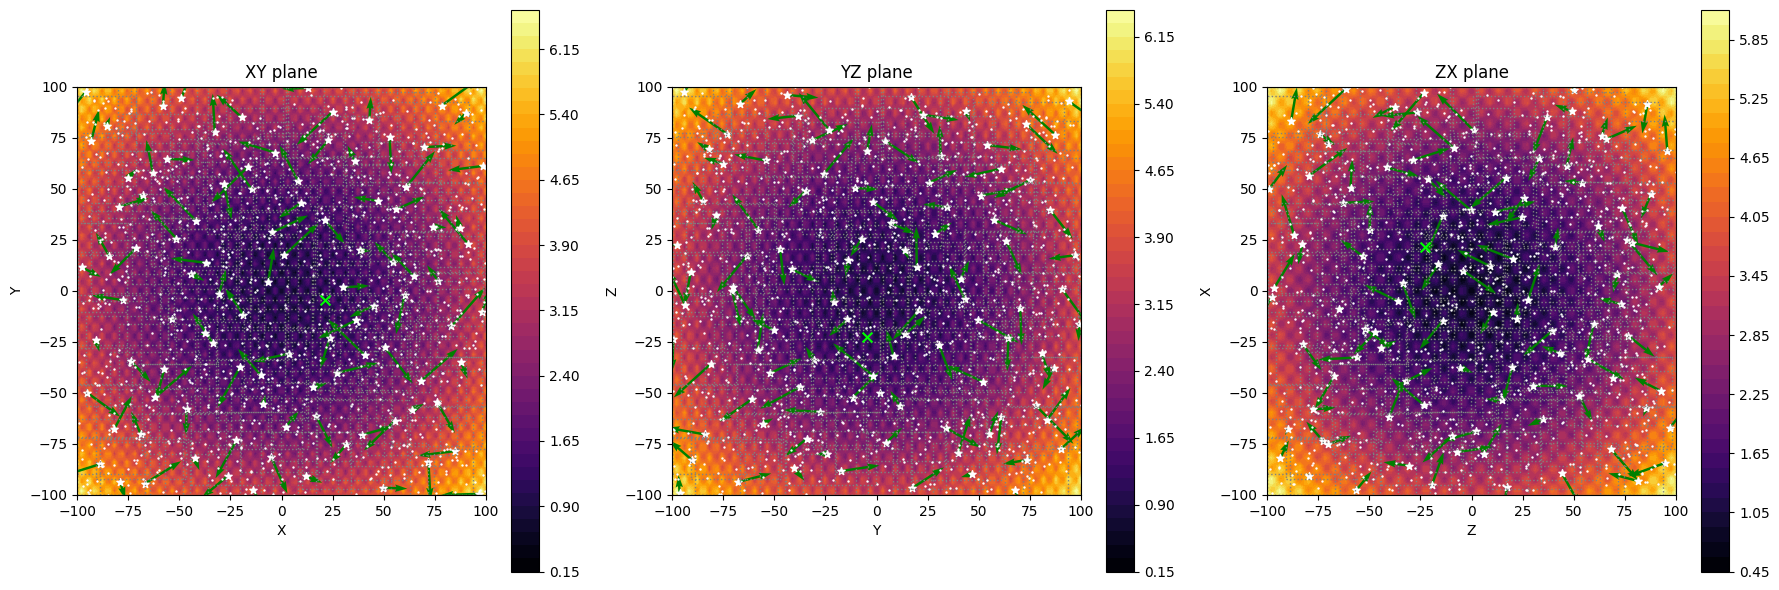

In [17]:
X0 = [pso.swarm.particles[p].position[0] for p in range(pso.number_of_particles)]
X1 = [pso.swarm.particles[p].position[1] for p in range(pso.number_of_particles)]
X2 = [pso.swarm.particles[p].position[2] for p in range(pso.number_of_particles)]
V0 = [pso.swarm.particles[p].velocity[0] for p in range(pso.number_of_particles)]
V1 = [pso.swarm.particles[p].velocity[1] for p in range(pso.number_of_particles)]
V2 = [pso.swarm.particles[p].velocity[2] for p in range(pso.number_of_particles)]
box_bounds = [pso.swarm.particles[p].box.bounds for p in range(pso.number_of_particles)]
# boxes_xx = [[box_bounds[p][0], box_bounds[p][0]] for p in range(pso.number_of_particles)]
# boxes_xy = [[box_bounds[p][0], box_bounds[p][1]] for p in range(pso.number_of_particles)]
# boxes_xz = [[box_bounds[p][0], box_bounds[p][2]] for p in range(pso.number_of_particles)]
sample_points = [[pso.swarm.particles[p].sample_points[s] for s in range(len(pso.swarm.particles[p].sample_points))] for p in range(pso.number_of_particles)]
all_sample_points = []
for p in range(len(sample_points)):
    for s in range(len(sample_points[p])):
        all_sample_points.append(sample_points[p][s]) 
all_sample_points_x = [sample_point[0] for sample_point in all_sample_points] 
all_sample_points_y = [sample_point[1] for sample_point in all_sample_points] 
all_sample_points_z = [sample_point[2] for sample_point in all_sample_points] 

# Function to compute the heat map for a given plane
def compute_plane(X, Y, func, fixed_var, fixed_value):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if fixed_var == 'z':
                Z[i, j] = func([X[i, j], Y[i, j], fixed_value])
            elif fixed_var == 'x':
                Z[i, j] = func([fixed_value, X[i, j], Y[i, j]])
            elif fixed_var == 'y':
                Z[i, j] = func([X[i, j], fixed_value, Y[i, j]])
    return Z

# Generate the grid for the heat maps
x_range = np.linspace(-100, 100, 100)
y_range = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x_range, y_range)

# Calculate Z values for each plane
Z_xy = compute_plane(X, Y, griewank, 'z', 1)  # z = 1
Z_xz = compute_plane(X, Y, griewank, 'y', 1)  # y = 1
Z_yz = compute_plane(X, Y, griewank, 'x', 1)  # x = 1

# Function to plot heatmap, particles, velocities, and boxes on a given plane
def plot_plane(ax, X, Y, VX, VY, bounds_2d, plane_name, Z, X_mesh, Y_mesh):
    c = ax.contourf(X_mesh, Y_mesh, Z, levels=50, cmap='inferno')
    fig.colorbar(c, ax=ax)
    ax.quiver(X, Y, VX, VY, angles='xy', scale_units='xy', scale=2, color='green')
    ax.scatter(X, Y, color='white', s=30, marker='*')
    for i in range(len(X)):
        x_min, x_max = bounds_2d[i][0]
        y_min, y_max = bounds_2d[i][1]
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='gray', linestyle='dotted'))
    ax.set_title(f"{plane_name} plane")
    ax.set_xlabel(plane_name[0])
    ax.set_ylabel(plane_name[1])
    ax.set_aspect('equal', adjustable='box')  # Ensure the aspect ratio is equal

# Plot on the xy, xz, and yz planes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# XY plane
plot_plane(axes[0], X0, X1, V0, V1, box_bounds, "XY", Z_xy, X, Y)
axes[0].scatter(all_sample_points_x, all_sample_points_y, color='w', marker='.', s=2)
axes[0].scatter(pso.swarm.global_max_loc[0], pso.swarm.global_max_loc[1], marker='x', color='lime', s=50)

# XZ plane
plot_plane(axes[1], X1, X2, V1, V2, box_bounds, "YZ", Z_xz, X, Y)
axes[1].scatter(all_sample_points_y, all_sample_points_z, color='w', marker='.', s=2)
axes[1].scatter(pso.swarm.global_max_loc[1], pso.swarm.global_max_loc[2], marker='x', color='lime', s=50)

# YZ plane
plot_plane(axes[2], X2, X0, V2, V0, box_bounds, "ZX", Z_yz, X, Y)
axes[2].scatter(all_sample_points_z, all_sample_points_x, color='w', marker='.', s=2)
axes[2].scatter(pso.swarm.global_max_loc[2], pso.swarm.global_max_loc[0], marker='x', color='lime', s=50)

plt.tight_layout()
plt.show()


In [18]:
pso.RankParticles()

# for particle in pso.swarm.particles:
#     print(particle.sample_points_results)

In [19]:
pso.WriteSamplePointsHistory()

In [20]:
pso.FindLowDensityRegions()

In [21]:
print(pso.swarm.adventure_leads)

[[ 78.30975819  35.74726384  28.29002117]
 [ 28.9438029   99.30441639 -78.9312294 ]
 [-35.46123759 -17.1268948  -64.45316301]
 [ 95.28977496  71.44225599 -83.34391697]
 [  1.8087376   -7.05804908  91.00955687]
 [-67.78370253 -36.58477189  98.29025946]
 [-99.26366235 -64.84788848 -97.77686636]
 [-29.33559113  94.79798519  24.94715625]
 [-91.09473283  29.80095883 -53.18136001]
 [ 61.48254867  38.71873754 -96.46855781]
 [-96.86467437 -31.5623703   -6.33158145]
 [ 18.5620739   13.07542863 -82.32913269]
 [ 85.07172493 -98.44772601  54.69960148]
 [-26.96373828  13.83739788  94.28013276]
 [-43.95666824 -76.92457057 -95.56780242]
 [ 61.4369317   55.83679031 -96.88123125]
 [-94.10561867  -4.74057214 -93.10479176]
 [ 99.98170424  99.93127509 -55.92806866]
 [ -8.33623371 -97.33022098 -92.07592268]
 [ 78.18523178 -34.29510434 -99.55791396]]


In [22]:
pso.AssignAdventureLeads()

[[ 15.52023124 -47.24261165  20.54670658]
 [-37.67039739 -20.90892326  -5.39174937]
 [-44.18536555   8.34297612 -31.85782563]
 [ 23.569143   -23.0448287   78.53500266]
 [-28.23191267  52.10921485 -44.54067182]
 [ -8.87433402 -55.42058218 -65.02250601]
 [  8.00779499  53.95238437  71.39753588]
 [ 12.06066888 -90.93784299   9.01037361]
 [ 56.28962927  39.86990787 -79.65259217]
 [ 55.42744286 -63.57110459  16.97583534]
 [-68.90825033 -70.25886029   2.06082556]
 [-22.09222857 -73.29469472  76.84189193]
 [-95.08563448 -49.98500887 -19.39969156]
 [ 74.26799815  31.37685899  66.08144697]
 [-26.1138536  -90.51123746 -82.73956627]
 [-97.63905518  11.38471738 -56.44506924]
 [-78.97959072 -93.67027469  -7.08272848]]
[[ 78.30975819  35.74726384  28.29002117]
 [ 28.9438029   99.30441639 -78.9312294 ]
 [-35.46123759 -17.1268948  -64.45316301]
 [ 95.28977496  71.44225599 -83.34391697]
 [  1.8087376   -7.05804908  91.00955687]
 [-67.78370253 -36.58477189  98.29025946]
 [-99.26366235 -64.84788848 -97.7

In [23]:
for particle in pso.swarm.particles:
    if particle.species == 2:
        print(particle.adventure_lead)

[-26.96373828  13.83739788  94.28013276]
[ 1.8087376  -7.05804908 91.00955687]
[ 28.9438029   99.30441639 -78.9312294 ]
[ 95.28977496  71.44225599 -83.34391697]
[ 18.5620739   13.07542863 -82.32913269]
[-94.10561867  -4.74057214 -93.10479176]
[-99.26366235 -64.84788848 -97.77686636]
[ 61.4369317   55.83679031 -96.88123125]
[-91.09473283  29.80095883 -53.18136001]
[-96.86467437 -31.5623703   -6.33158145]
[-35.46123759 -17.1268948  -64.45316301]
[ 61.48254867  38.71873754 -96.46855781]
[78.30975819 35.74726384 28.29002117]
[-67.78370253 -36.58477189  98.29025946]
[ 85.07172493 -98.44772601  54.69960148]
[-43.95666824 -76.92457057 -95.56780242]
[-29.33559113  94.79798519  24.94715625]
